# 001 Data Preprocessing...

In [191]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# there are questions to ask when you have a dataset. Do you want to predict a variable? or perform some regression or classification
# this questions determine what to do and even inform the kind of data wrangling to perform.

In [3]:
data=pd.read_csv('happy2015.csv') # using the happiness dataset from Kaggle... credit to mineva's tutorial on Datascience and machine learning

In [8]:
data.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [12]:
#lets make a copy of the data then rename the columns
df1=data[:]

In [15]:
#renaming columns of df1 with long names: e.g. Economy(GDP per Capital) to Economy, Health( Life Expectancy) to Health and Trust(Gov. Corruption) to COrruption
df1.columns


Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [23]:
df1.rename(columns={'Happiness Rank':'Hrank','Happiness Score':'Hscore','Economy (GDP per Capita)':'Economy','Health (Life Expectancy)':'Health','Trust (Government Corruption)':'Corruption'},inplace=True)

In [26]:
df1.head() # we can see the column names look more simpler...it helps in typing in subsequent codes

,Country,Region,Hrank,Hscore,Standard Error,Economy,Family,Health,Freedom,Corruption,Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


#### checking for missing values... 

In [27]:
#checking for missing values in the dataset...
data.isnull().values.sum()
#from the result we can say the data has no missing values...missing values actually affects the quality of the any analytic 
#work to be done. and so its important to remove them if they are small in number but if there are many null values, we either 
#replace the null values with the average of the values or use zero depending on the nature of the analysis to be carried out

0

In [177]:
df=df1[['Region','Hscore','Freedom','Corruption','Economy','Health']] #slicing off some of the columns

In [178]:
df['Region']

0                       Western Europe
1                       Western Europe
2                       Western Europe
3                       Western Europe
4                        North America
                    ...               
153                 Sub-Saharan Africa
154                 Sub-Saharan Africa
155    Middle East and Northern Africa
156                 Sub-Saharan Africa
157                 Sub-Saharan Africa
Name: Region, Length: 158, dtype: object

In [179]:
#we may say the regions of western Europe have the highest Happiness score and they also score high on the level of freedom.
#but we want to know on average,how each region fared on the happiness and freedom score. So I will find the average scores for
#each category of the region.

In [180]:
x=df.sort_values(by='Region') # slicing out the two variables of interest...Hscore and Freedom

In [181]:
x

,Region,Hscore,Freedom,Corruption,Economy,Health
8,Australia and New Zealand,7.286,0.63938,0.42922,1.25018,0.90837
9,Australia and New Zealand,7.284,0.65124,0.35637,1.33358,0.93156
63,Central and Eastern Europe,5.716,0.36679,0.03005,1.13764,0.66926
61,Central and Eastern Europe,5.759,0.25883,0.02430,1.08254,0.78805
129,Central and Eastern Europe,4.297,0.40577,0.38331,0.74190,0.72926
...,...,...,...,...,...,...
66,Western Europe,5.689,0.40672,0.06146,1.20813,0.92356
87,Western Europe,5.102,0.51469,0.01078,1.15991,0.87519
101,Western Europe,4.857,0.07699,0.01397,1.15406,0.88213
18,Western Europe,6.937,0.58450,0.22540,1.30782,0.89667


In [182]:
m=x.groupby(['Region']).mean() 


In [183]:
m.sort_values(by='Freedom',ascending=False)

,Hscore,Freedom,Corruption,Economy,Health
Region,,,,,
Australia and New Zealand,7.285000,0.645310,0.392795,1.291880,0.919965
North America,7.273000,0.589505,0.244235,1.360400,0.883710
Southeastern Asia,5.317444,0.557104,0.151276,0.789054,0.677357
Western Europe,6.689619,0.549926,0.231463,1.298596,0.909148
Latin America and Caribbean,6.144682,0.501740,0.117172,0.876815,0.703870
Eastern Asia,5.626167,0.462490,0.127695,1.151780,0.877388
Southern Asia,4.580857,0.373337,0.102536,0.560486,0.540830
Sub-Saharan Africa,4.202800,0.365944,0.123878,0.380473,0.282332
Middle East and Northern Africa,5.406900,0.361751,0.181702,1.066974,0.705616


In [184]:
#from the data, Australia and New Zealand regions have high scores on Freedom...And Sub-saharan africa has more freedom than most
#countries in Central and Eastern Europe. 

## Visualization

In [186]:
# we visualize the relationship among the variables
import seaborn as sns

<AxesSubplot:xlabel='Region', ylabel='Freedom'>

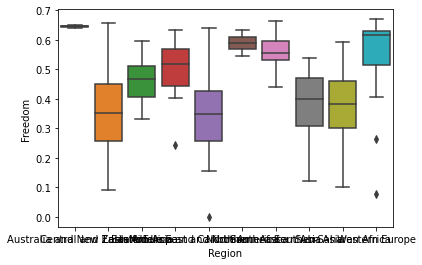

In [189]:
sns.boxplot(x="Region",y="Freedom",data=x)

In [190]:
#this is the boxplot for the various regions...thus Australis and Netherlands, North America etc... the boxplot indicates the nature
#of the variables with respect to freedom. We can explain that the box for Australia and Netherlands is very small.. indication that theres 
#small variation in the freedom scores of the countries in this region. Ofcourse there are few extreme values in some of the 
#freedom scores for central and Eastern Europe.

performing a histogram... we are interested in the distribution of the freedom and happiness score variable etc

array([[<AxesSubplot:title={'center':'Hscore'}>,
        <AxesSubplot:title={'center':'Freedom'}>],
       [<AxesSubplot:title={'center':'Corruption'}>,
        <AxesSubplot:title={'center':'Economy'}>],
       [<AxesSubplot:title={'center':'Health'}>, <AxesSubplot:>]],
      dtype=object)

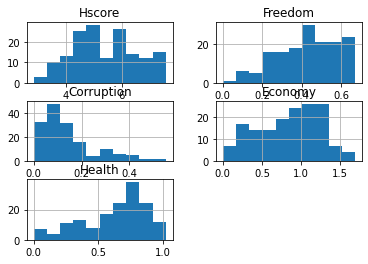

In [192]:
x.hist()   # the distribution of the five variables for the various regions:

In [194]:
# we can also isolate the freedom variable and check the distribution for only freedom.
fr=x['Freedom']   #across the various regions the distribution of freedom is as seen below.

<AxesSubplot:>

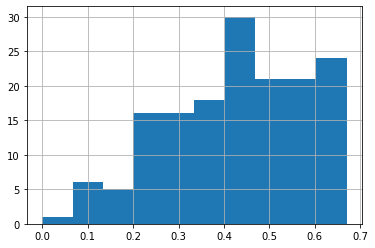

In [195]:
fr.hist()

<AxesSubplot:>

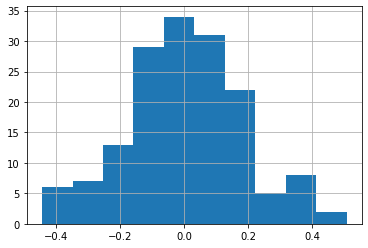

In [196]:
#to improve the histogram plot, we introduce a few things! by centring the histogram
plt.figure();
x['Freedom'].diff().hist()


In [197]:
#we want to explore the relationship between the various categorical variables using scatter plot...it 
#will help us understand the association between the quantitative variables

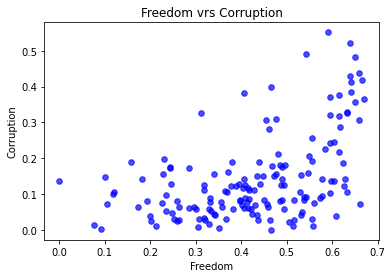

In [231]:
plt.scatter(x['Freedom'],x['Corruption'], 
           marker='.',
            color='b',
           alpha=0.7,
            s=124)
plt.title("Freedom vrs Corruption")
plt.xlabel('Freedom')
plt.ylabel('Corruption')
plt.show()

There seem to be some linear association between Corruption and Freedom. from the scatter plot above. Take note that the association does not in anyway indicate causality between the variables.

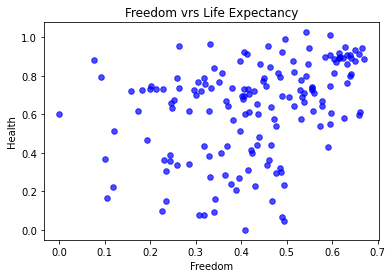

In [226]:
plt.scatter(x['Freedom'],x['Health'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Freedom vrs Life Expectancy")
plt.xlabel('Freedom')
plt.ylabel('Health')
plt.show()

There is no clear linear assocition between the variables Health and Freedom, by way of interpretation it means that Freedom does not have any impact on the life expectancy of the people in the various regions. Also we do not see any correlation betweeen freedom and Life Expectancy.

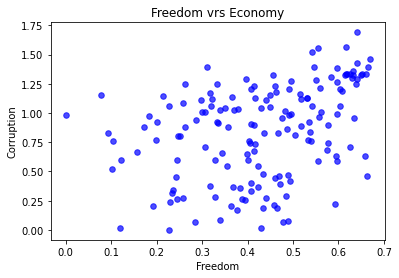

In [225]:
plt.scatter(x['Freedom'],x['Economy'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Freedom vrs Economy")
plt.xlabel('Freedom')
plt.ylabel('Corruption')
plt.show()

It can be seen that there is no linear association between Freedom and Economy(GDP per Capital)

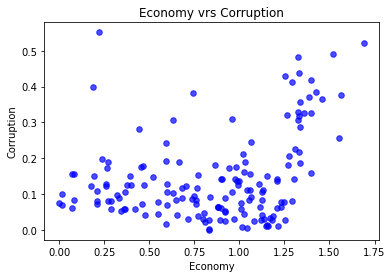

In [224]:
plt.scatter(x['Economy'],x['Corruption'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Economy vrs Corruption")
plt.xlabel('Economy')
plt.ylabel('Corruption')
plt.show()

There appears to be no clear linear association between Economic performance in terms of GDP and Corruption.

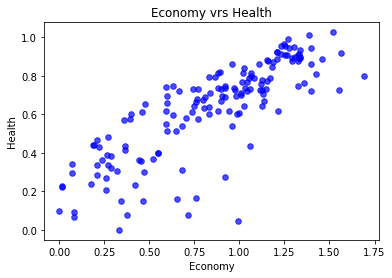

In [223]:
plt.scatter(x['Economy'],x['Health'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Economy vrs Health")
plt.xlabel('Economy')
plt.ylabel('Health')
plt.show()

There is clear linear Association between Health(Life Expecatancy) and Economic performance (GDP per capital). We can interprete this to mean that there increasing Economic fortunes of the regions see an increasing Life expectancy. That is that people tend to live longer with increasing better economic fortunes. 

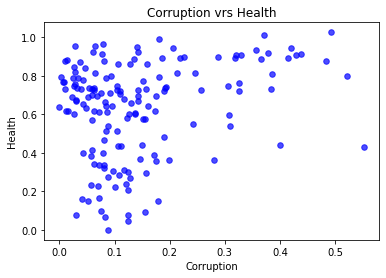

In [222]:
plt.scatter(x['Corruption'],x['Health'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Corruption vrs Health")
plt.xlabel('Corruption')
plt.ylabel('Health')
plt.show()

There is no positive linear association between corruption and Life Expectancy. 

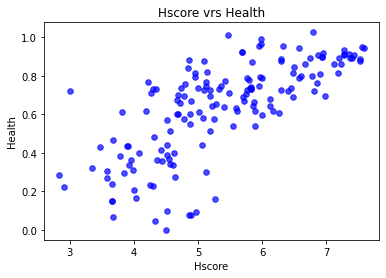

In [221]:
plt.scatter(x['Hscore'],x['Health'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Hscore vrs Health")
plt.xlabel('Hscore')
plt.ylabel('Health')
plt.show()

With increasing Health is associated increasing Happiness Score. This makes sence to me!

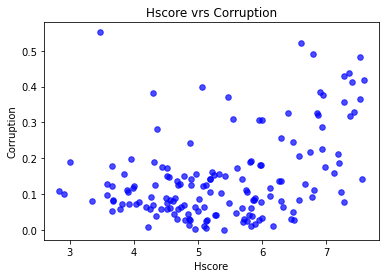

In [220]:
plt.scatter(x['Hscore'],x['Corruption'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Hscore vrs Corruption")
plt.xlabel('Hscore')
plt.ylabel('Corruption')
plt.show()

There appears to be no positive linear association between Corruption and Happiness Score

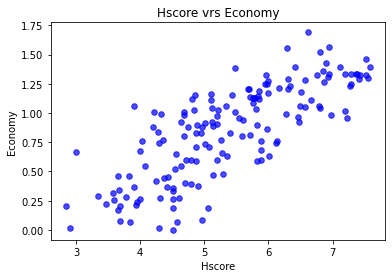

In [219]:
plt.scatter(x['Hscore'],x['Economy'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Hscore vrs Economy")
plt.xlabel('Hscore')
plt.ylabel('Economy')
plt.show()

Here there is a positive linear association between the Economy and Happiness score.

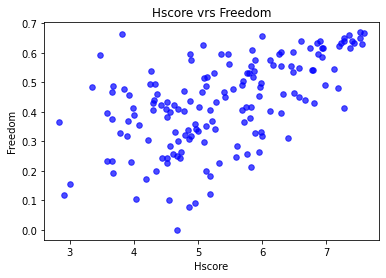

In [218]:
plt.scatter(x['Hscore'],x['Freedom'], 
           marker='.',
           color='b',
           alpha=0.7,
            s=124)
plt.title("Hscore vrs Freedom")
plt.xlabel('Hscore')
plt.ylabel('Freedom')
plt.show()

There appears to be a positive linear association between Happiness Score and Freedom

In [216]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='Hscore', ylabel='Hscore'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Hscore'>,
        <AxesSubplot:xlabel='Corruption', ylabel='Hscore'>,
        <AxesSubplot:xlabel='Economy', ylabel='Hscore'>,
        <AxesSubplot:xlabel='Health', ylabel='Hscore'>],
       [<AxesSubplot:xlabel='Hscore', ylabel='Freedom'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Freedom'>,
        <AxesSubplot:xlabel='Corruption', ylabel='Freedom'>,
        <AxesSubplot:xlabel='Economy', ylabel='Freedom'>,
        <AxesSubplot:xlabel='Health', ylabel='Freedom'>],
       [<AxesSubplot:xlabel='Hscore', ylabel='Corruption'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Corruption'>,
        <AxesSubplot:xlabel='Corruption', ylabel='Corruption'>,
        <AxesSubplot:xlabel='Economy', ylabel='Corruption'>,
        <AxesSubplot:xlabel='Health', ylabel='Corruption'>],
       [<AxesSubplot:xlabel='Hscore', ylabel='Economy'>,
        <AxesSubplot:xlabel='Freedom', ylabel='Economy'>,

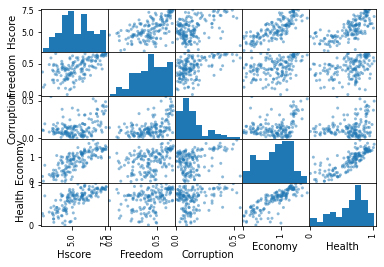

In [217]:
scatter_matrix(x)

this is the matrix of the variables together. It is not too clear but it gives an idea of the association between the variables 

In [243]:
m1=m.iloc[:,1:2]  # slicing out the variable Fredom we can draw a barplot to see which regions score highest in freedom

In [244]:
m1

,Freedom
Region,
Australia and New Zealand,0.645310
Central and Eastern Europe,0.358269
Eastern Asia,0.462490
Latin America and Caribbean,0.501740
Middle East and Northern Africa,0.361751
North America,0.589505
Southeastern Asia,0.557104
Southern Asia,0.373337
Sub-Saharan Africa,0.365944


<AxesSubplot:xlabel='Region'>

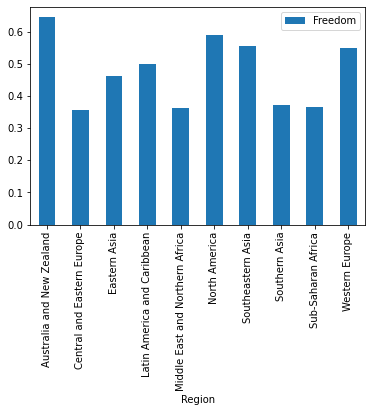

In [246]:
m1.plot.bar() # a barplot of the regions with freedom

We see that Australia and New Zealand score high on freedom followed by Weatern Europe, then North America and South eastern Asia. SUb-saharan africa is among the lowest

In [256]:
m2=m.iloc[:,2:3]

<AxesSubplot:xlabel='Region'>

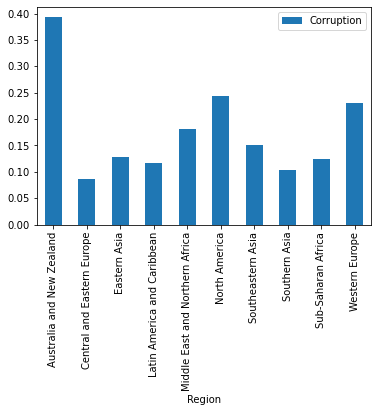

In [257]:
m2.plot.bar()

In [250]:
m3=m.iloc[:,3:4]

<AxesSubplot:xlabel='Region'>

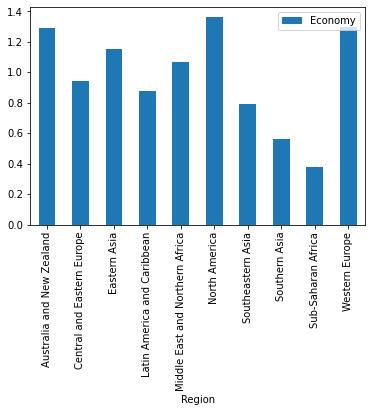

In [251]:
m3.plot.bar()

In [254]:
m4=m.iloc[:,4:5]

<AxesSubplot:xlabel='Region'>

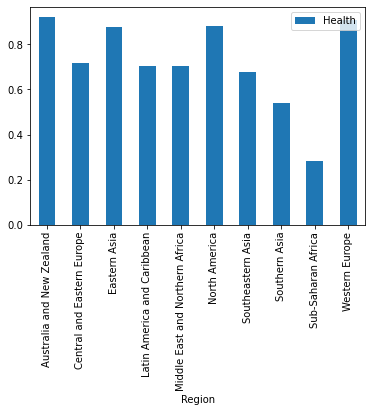

In [255]:
m4.plot.bar()

<AxesSubplot:title={'center':'Barplot of four variables'}, xlabel='regions'>

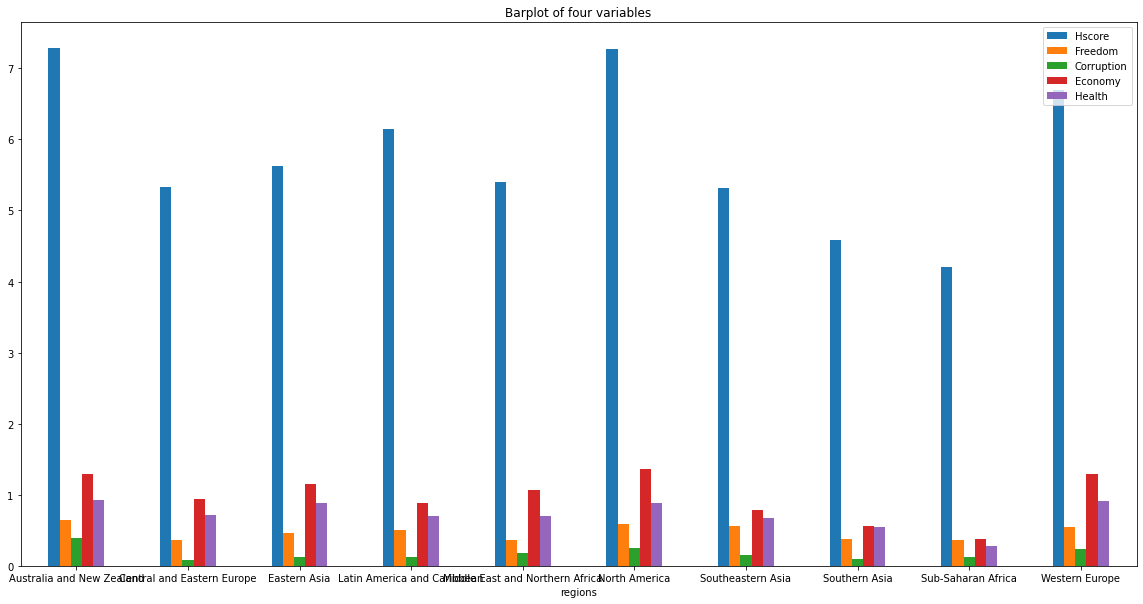

In [277]:
m.plot.bar(rot=0, title='Barplot of four variables',xlabel='regions',figsize=(20,10),fontsize=10)

the baeplot above demonstrate the level of the four variables for the various regions. many interpretations can be assigned based on the figure above. But we can say that this confirms what the individual barplots have depicted so far.

## Some Statistics to consider

#### Correlation statistics

In [278]:
cor1=m.corr()

In [279]:
cor1

,Hscore,Freedom,Corruption,Economy,Health
Hscore,1.000000,0.842578,0.780013,0.898980,0.862763
Freedom,0.842578,1.000000,0.767822,0.640073,0.671786
Corruption,0.780013,0.767822,1.000000,0.658320,0.577569
Economy,0.898980,0.640073,0.658320,1.000000,0.956739
Health,0.862763,0.671786,0.577569,0.956739,1.000000


The Happiness score have high correlation with almost all the other variables, but score highly with Economy, and Health(Life expectancy). Freedom score highly with corruption.

In [281]:
from statsmodels import api as sm

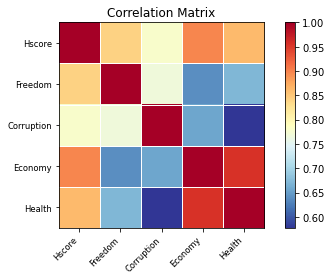

In [288]:
sm.graphics.plot_corr(cor1,xnames=list(cor1.columns))
plt.show()